# hk total recycling volume & G@C recycling volume

Model Summary:
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       1.787e+06   7.02e+04     25.463      0.000    1.62e+06    1.95e+06
G@C recyclables collection volume (tonnes)     5.1442      5.681      0.906      0.395      -8.288      18.576

R-squared: 0.1049


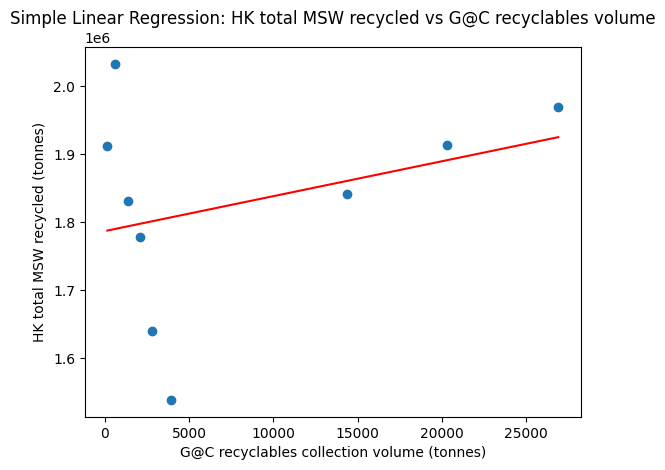

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK total MSW recycled vs G@C recyclables collection volume

# Prepare data
col_y = "HK total MSW recycled (tonnes)"
col_x = "G@C recyclables collection volume (tonnes)"

# Keep only rows where BOTH columns have data (this automatically aligns the years)
mask = df[[col_y, col_x]].notna().all(axis=1)
X_gc = df.loc[mask, [col_x]]
y = df.loc[mask, col_y]

# Fit model using sklearn for predictions
lin_reg_gc = LinearRegression()
lin_reg_gc.fit(X_gc, y)

# Fit model using statsmodels for statistical tests
X_gc_sm = sm.add_constant(X_gc)  # Add constant term for intercept
model_gc = sm.OLS(y, X_gc_sm)
results_gc = model_gc.fit()

# Predictions for plotting
y_pred_gc = lin_reg_gc.predict(X_gc)

print("Model Summary:")
print(results_gc.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_gc.rsquared:.4f}")

# Plot
plt.scatter(X_gc, y)
plt.plot(X_gc, y_pred_gc, color='red')
plt.xlabel('G@C recyclables collection volume (tonnes)')
plt.ylabel('HK total MSW recycled (tonnes)')
plt.title('Simple Linear Regression: HK total MSW recycled vs G@C recyclables volume')
plt.show()


**G@C recyclables volume coefficient ($\hat \beta_1$) ≈ 5.1442 (p ≈ 0.395 > 0.05)**  

- There is **no statistically significant association** between G@C recyclables collection volume and Hong Kong’s total MSW recycled at the 5% significance level.  

- G@C recyclables collection volume can only explain a **very limited proportion of the variance** in the total MSW recycled (**R-squared ≈ 0.105**), meaning most of the year-to-year change in Hong Kong’s total recycling tonnage is driven by other factors.
